In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cuda', index=0)

In [4]:
x=torch.linspace(-1,1,100)
x=torch.unsqueeze(x,1)
y=x.pow(2)+torch.rand(x.size())*0.2
x,y = Variable(x).to(device), Variable(y).to(device)

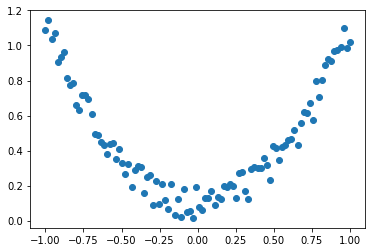

In [5]:
plt.scatter(x.cpu().numpy(),y.cpu().numpy())

In [6]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        pass
    def forward(self,x):
        x=self.hidden(x)
        x=F.relu(x)
        
        x=self.predict(x)
        return x
    pass

In [13]:
net=Net(1,1000,1)
net.to(device)

Net(
  (hidden): Linear(in_features=1, out_features=1000, bias=True)
  (predict): Linear(in_features=1000, out_features=1, bias=True)
)

In [14]:
criterion=F.mse_loss
optimizer=torch.optim.SGD(net.parameters(),lr=0.001)

In [15]:
loss_list=torch.tensor([]).to(device)

In [16]:
import time

In [19]:
s=time.process_time()
list_cpu=[]
for i in range(10000):
    predictions=net(x)
    loss=criterion(predictions,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    list_cpu.append(loss.item())
#     torch.cat((loss_list,torch.tensor(loss.item())))
    
#     if i % 10 == 0:
#         plt.cla()  # Clear axis即清除当前图形中的当前活动轴。其他轴不受影响
#         plt.scatter(x.data.numpy(),y.data.numpy())
#         plt.plot(x.data.numpy(),predictions.data.numpy(),'r',lw=3)
#         plt.text(0.5,0,'Loss'+str(loss.item()))
#         plt.pause(0.1)
#         pass
#     pass
# plt.ioff()
# plt.show()
e=time.process_time()
print('time: ',e-s)

time:  9.28125


<function matplotlib.pyplot.show(close=None, block=None)>

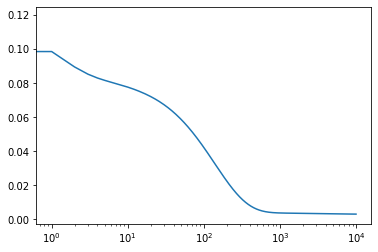

In [20]:
# loss_list.pop(0)
plt.figure()
plt.xscale('log')
plt.plot(list_cpu)
plt.show

SyntaxError: invalid syntax (<ipython-input-49-1f393369718e>, line 1)